# Perkenalan

Nama: Made Ary Widanthi <br>
Batch: FTDS 020 RMT<br>
Dataset: Hotel Reservation <br>
Source: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset <br>
Latar Belakang: Hotel King ingin membuat model machine learning untuk memprediksi tamu hotel yang melakukan reservasi apa akan melakukan cancelation atau tidak. Dengan mengetahui hal ini, Hotel King dapat memperhitungkan strategy yang dapat mencegah calon tamu hotel membatalkan reservasi. <br>
Objective: Buatlah model Classification untuk memprediksi apakah calon tamu hotel akan membatalkan reservasi atau tidak.

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
!pip install feature-engine
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
import joblib
import json

# Data Loading

In [2]:
data = pd.read_csv('Hotel Reservations.csv')
data.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [3]:
data.tail(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36265,INN36266,2,0,1,3,Meal Plan 1,0,Room_Type 1,15,2018,5,30,Online,0,0,0,100.73,0,Not_Canceled
36266,INN36267,2,0,2,2,Meal Plan 1,0,Room_Type 2,8,2018,3,4,Online,0,0,0,85.96,1,Canceled
36267,INN36268,2,0,1,0,Not Selected,0,Room_Type 1,49,2018,7,11,Online,0,0,0,93.15,0,Canceled
36268,INN36269,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,2018,11,1,Offline,0,0,0,110.00,0,Canceled
36269,INN36270,2,2,0,1,Meal Plan 1,0,Room_Type 6,0,2018,10,6,Online,0,0,0,216.00,0,Canceled
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [6]:
data_duplicate = data.copy()

#EDA (Exploratory Data Analysis)

In [7]:
#mencari unique value pada setiap features
for column in data:
  print(column, ":", data[column].unique(), '\n')

Booking_ID : ['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275'] 

no_of_adults : [2 1 3 0 4] 

no_of_children : [ 0  2  1  3 10  9] 

no_of_weekend_nights : [1 2 0 4 3 6 5 7] 

no_of_week_nights : [ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16] 

type_of_meal_plan : ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3'] 

required_car_parking_space : [0 1] 

room_type_reserved : ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3'] 

lead_time : [224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134
 320 118 189  16  24   8  10 182 116 123 105 443 317 286 148  14  85  25
  28  80  11 162  82  27 245 266 112  88  69 273   4  97  31  62 197 280
 185 160 104  22 292 109 126 303

In [8]:
#Memisahkan column numerik dengan categorik
num_cols = list(data.select_dtypes('number'))
cat_cols = list(data.select_dtypes('object'))
print(num_cols)
print(cat_cols)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64


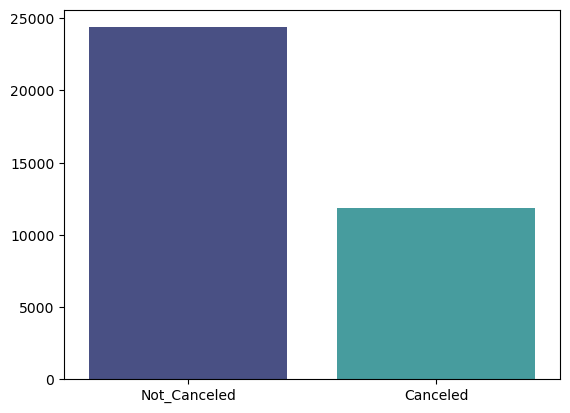

In [9]:
print(data['booking_status'].value_counts())
booking_status = data['booking_status'].value_counts()
ax = sns.barplot(x=booking_status.index, y=booking_status.values, palette='mako', errwidth=0)

Sebanyak 32.76% orang yang melakukan cancelation. (data 1:3 dan termasuk data balance)

In [10]:
#membuat function untuk visualisasi
def eda (x):
  data_chek = data.groupby([x, 'booking_status']).size().reset_index(name='count')
  ax = sns.barplot(x=x, y='count', hue='booking_status', data=data_chek, palette='mako', errwidth=0)
  plt.show()

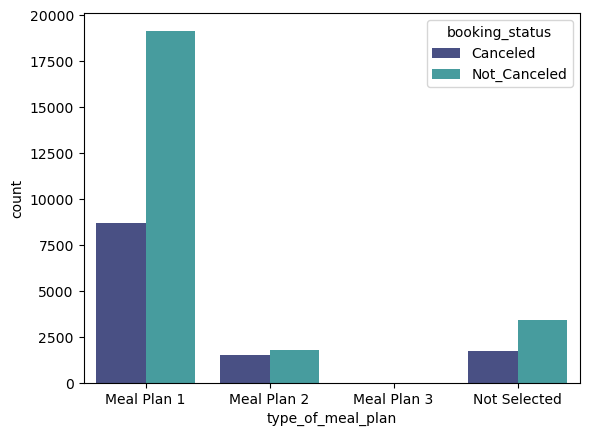

type_of_meal_plan None


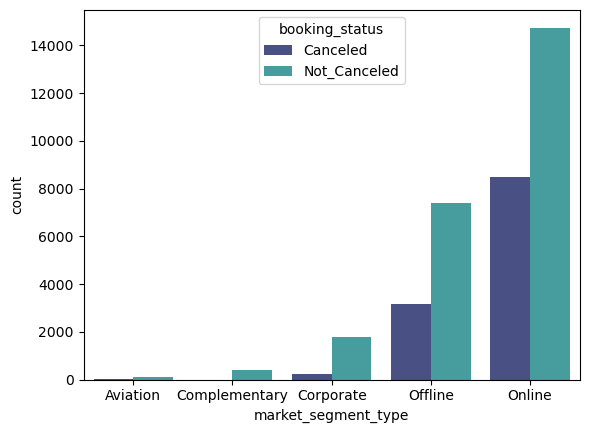

market_segment_type None


In [11]:
for column in data[['type_of_meal_plan', 'market_segment_type' ]]:
  print(column, eda(column))

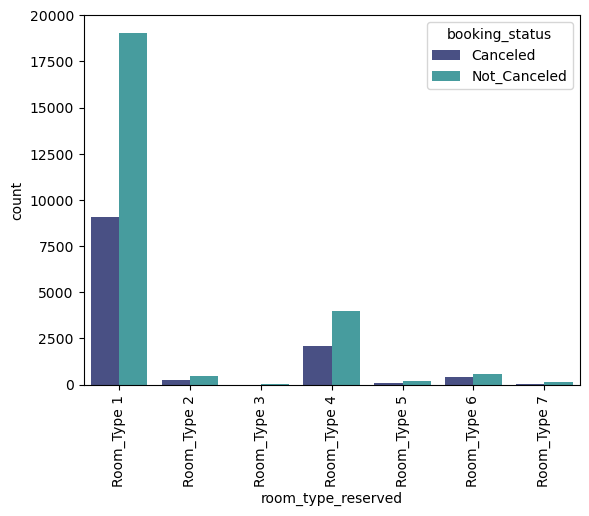

In [12]:
data_chek = data.groupby(['room_type_reserved', 'booking_status']).size().reset_index(name='count')
ax = sns.barplot(x='room_type_reserved', y='count', hue='booking_status', data=data_chek, palette='mako', errwidth=0)
plt.xticks (rotation = 'vertical')
plt.show()

Insight: <br>
Tamu mayoritas melakukan reservasi online dan memilih room type 1 dengan meal plan 1 sebagai pilihan kamar dan paket makanan.

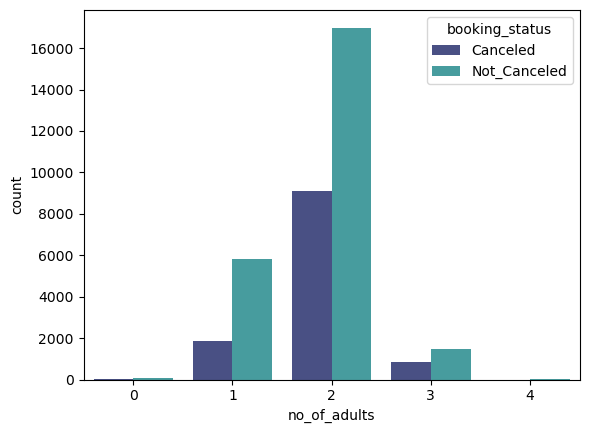

no_of_adults None


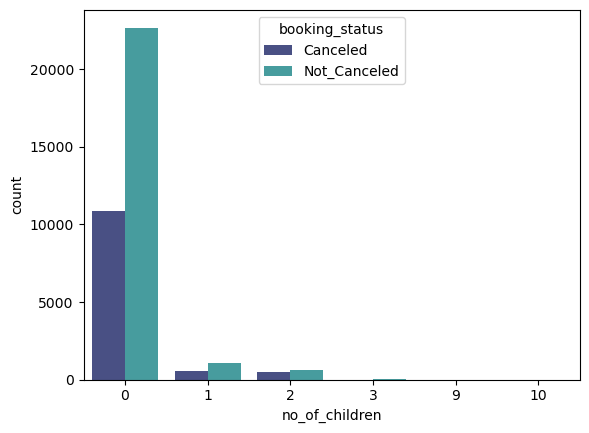

no_of_children None


In [13]:
for column in data[['no_of_adults', 'no_of_children']]:
  print(column, eda(column))

Insight:
- jumlah orang yang biasanya melakukan cancelation adalah orang yang akan melakukan reservasi untuk 2 orang dan biasanya tidak membawa anak-anak.


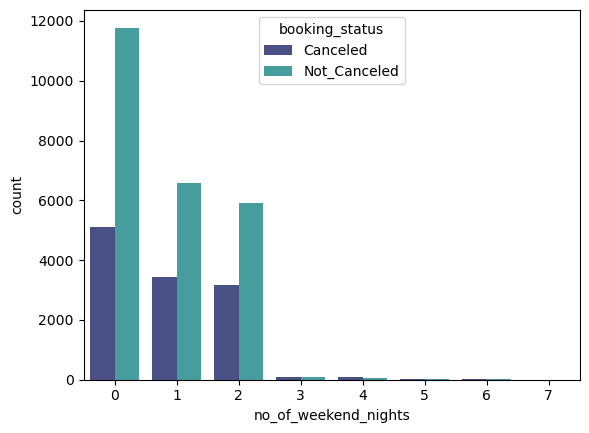

no_of_weekend_nights None


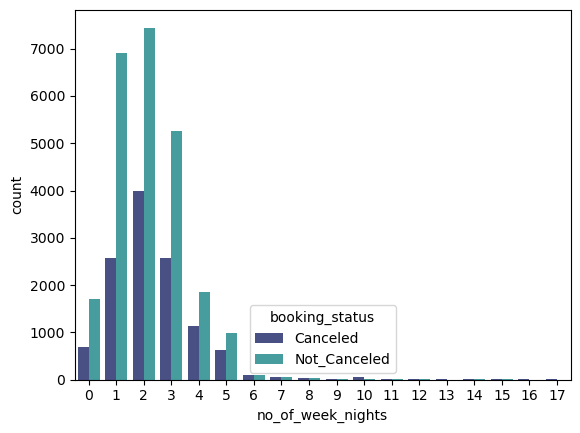

no_of_week_nights None


In [14]:
for column in data[['no_of_weekend_nights', 'no_of_week_nights']]:
  print(column, eda(column))

Insight:<br>
Tamu hotel biasanya tinggal di hotel dalam jangka pendek, pada weekdays biasanya melakukan reservasi paling banyak selama 1-3 hari.

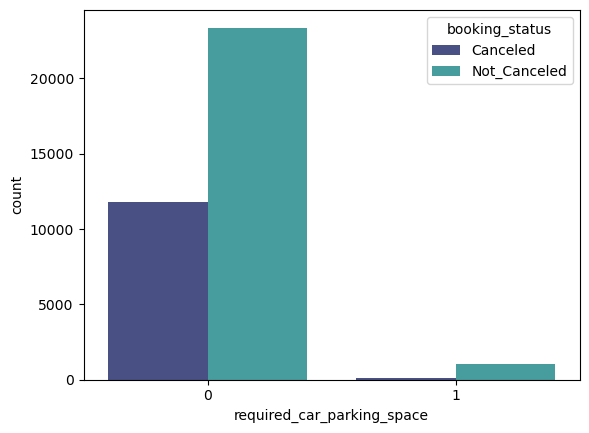

required_car_parking_space None


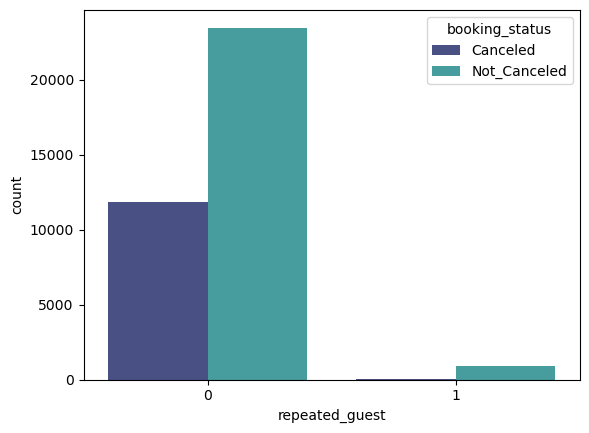

repeated_guest None


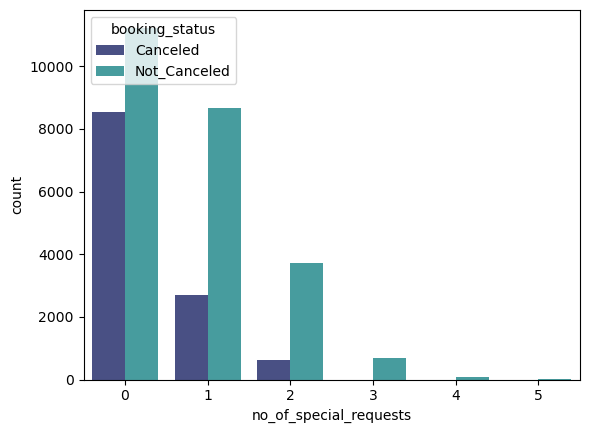

no_of_special_requests None


In [15]:
for column in data[['required_car_parking_space', 'repeated_guest', 'no_of_special_requests']]:
  print(column, eda(column))

Insight:
- Sedikit guest yang request untuk parking space, hipotesisnya hotel tersebut memiliki tempat parkir yang memadai.
- Repeated guest biasanya melakukan reservasi lagi tanpa melakukan cancelation
- Semakin banyak guest memberikan special request, hal ini mencegah mereka dalam melakukan cancelation.

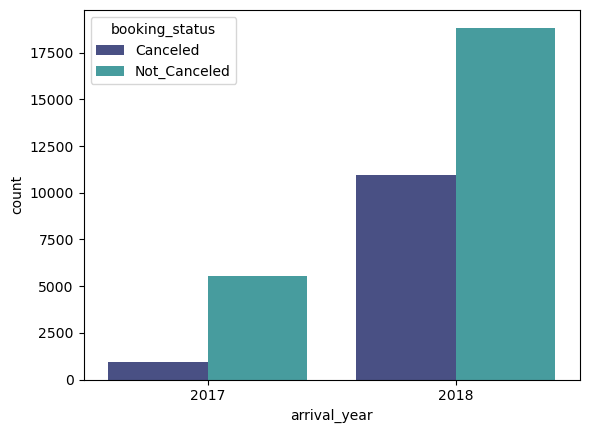

arrival_year None


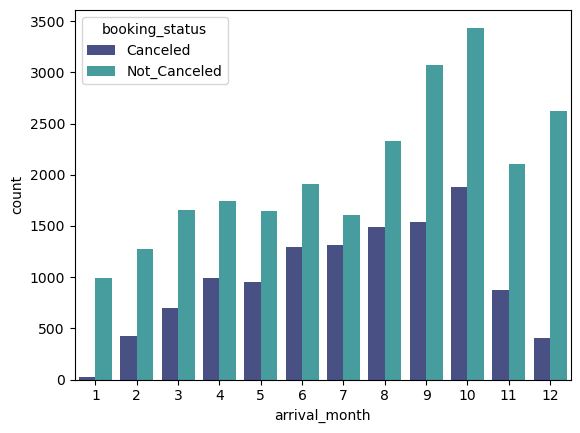

arrival_month None


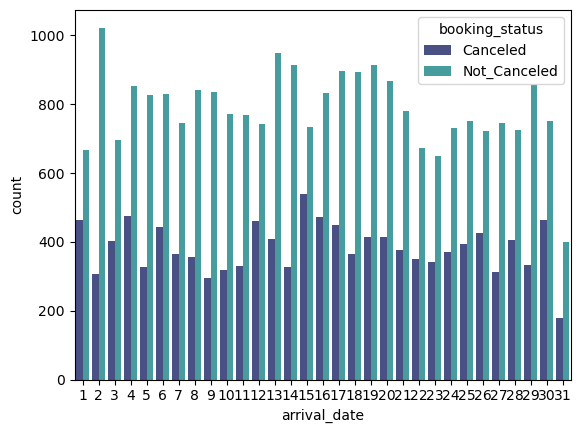

arrival_date None


In [16]:
for column in data[['arrival_year', 'arrival_month', 'arrival_date']]:
  print(column, eda(column))

Insight: <br>
- Peak season tertinggi berada di bulan 9 dan 10.

C:\Users\arywi\AppData\Local\Temp\ipykernel_8792\2654271677.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', shade=True, data=data)


<Axes: xlabel='lead_time', ylabel='Density'>

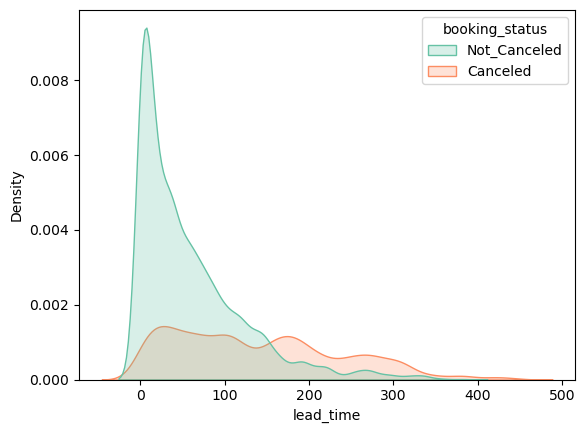

In [17]:
plt.subplot(1,1,1)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', shade=True, data=data)

lead time adalah jarak waktu antara booking dengan arrival date. Dapat dilihat bahwa orang yang melakukan cancelation kemungkinan besar melakukan reservasi jauh hari sebelum arrival date.

C:\Users\arywi\AppData\Local\Temp\ipykernel_8792\2887940188.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='avg_price_per_room', hue='booking_status', palette = 'Set2', shade=True, data=data)


<Axes: xlabel='avg_price_per_room', ylabel='Density'>

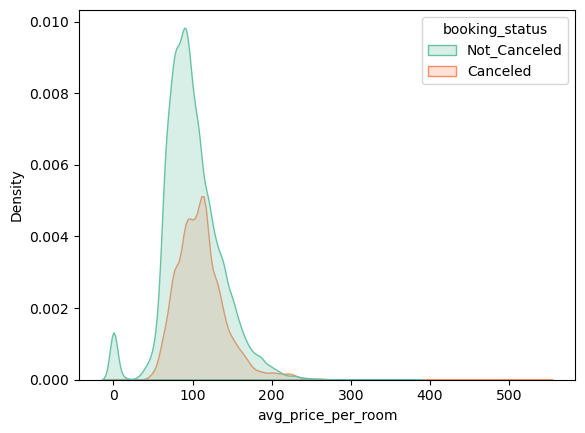

In [18]:
plt.subplot(1,1,1)
sns.kdeplot(x='avg_price_per_room', hue='booking_status', palette = 'Set2', shade=True, data=data)

Hipotesis: Harga kamar hotel tidak terlalu berpengaruh pada cancelation.

# Feature Engineering

## Split between Train-Set and Test-Set

In [19]:
# Splitting between `X` and `y`

X = data.drop(['booking_status', 'Booking_ID'], axis=1)
y = data['booking_status']
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0


In [20]:
# Splitting between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)
X_train

Train Size :  (29020, 17)
Test Size :  (7255, 17)


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
33091,2,0,1,4,Meal Plan 1,0,Room_Type 1,154,2018,9,12,Offline,0,0,0,80.75,0
4056,2,0,0,2,Meal Plan 1,0,Room_Type 1,58,2018,12,9,Online,0,0,0,93.60,1
33930,2,0,1,1,Meal Plan 1,0,Room_Type 1,180,2018,5,2,Offline,0,0,0,100.00,1
16884,2,0,1,2,Meal Plan 2,0,Room_Type 1,180,2018,10,28,Offline,0,0,0,100.08,2
34666,2,0,1,3,Not Selected,0,Room_Type 1,17,2018,3,17,Online,0,0,0,97.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31044,2,0,1,1,Meal Plan 1,0,Room_Type 1,17,2018,2,22,Offline,0,0,0,87.00,1
25631,2,0,0,2,Meal Plan 1,0,Room_Type 1,0,2017,10,28,Online,0,0,0,95.10,0
33174,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,2,13,Corporate,0,0,0,79.00,0
34959,3,0,0,3,Meal Plan 1,0,Room_Type 4,63,2018,8,9,Online,0,0,0,168.30,0


# Handle Outlier

## Check data distribution

In [21]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [22]:
numeric_data = data[['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']]

no_of_adults                            -0.333295
no_of_children                           4.710350
no_of_weekend_nights                     0.737616
no_of_week_nights                        1.599350
required_car_parking_space               5.413643
lead_time                                1.292492
arrival_year                            -1.669695
arrival_month                           -0.348229
arrival_date                             0.028809
repeated_guest                           6.002888
no_of_previous_cancellations            25.199876
no_of_previous_bookings_not_canceled    19.250191
avg_price_per_room                       0.667133
no_of_special_requests                   1.145081
dtype: float64


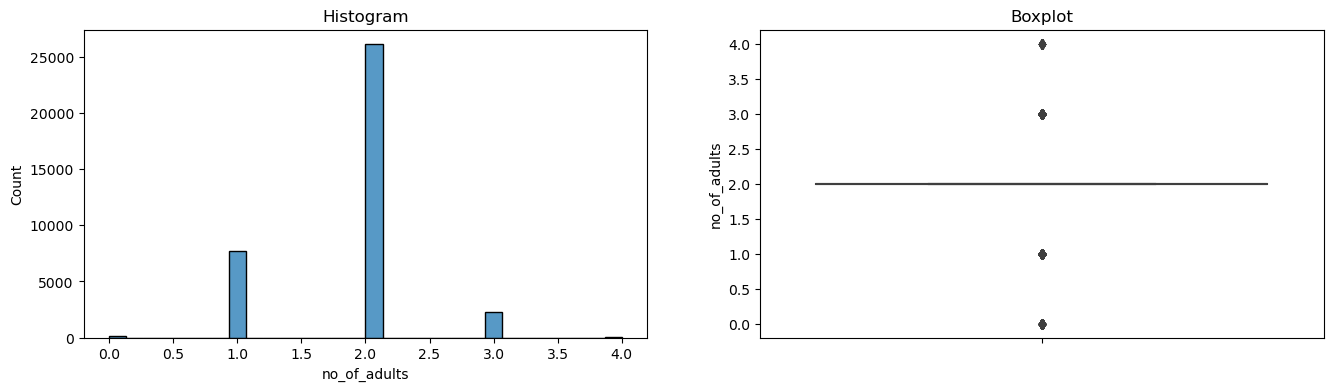

no_of_adults : None


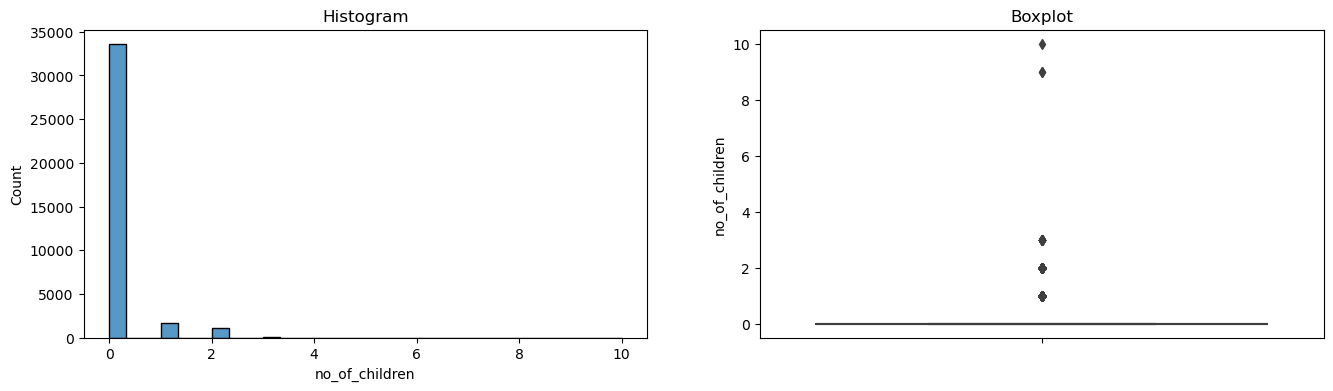

no_of_children : None


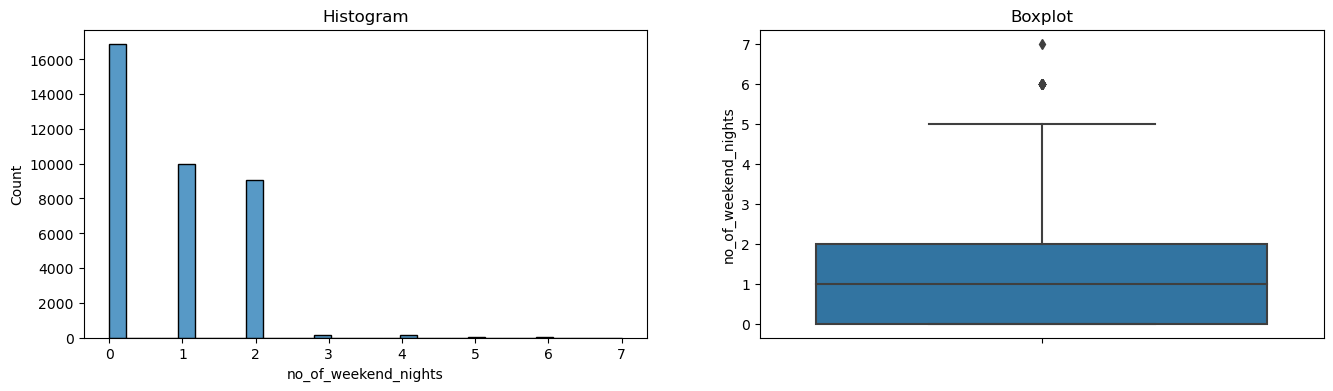

no_of_weekend_nights : None


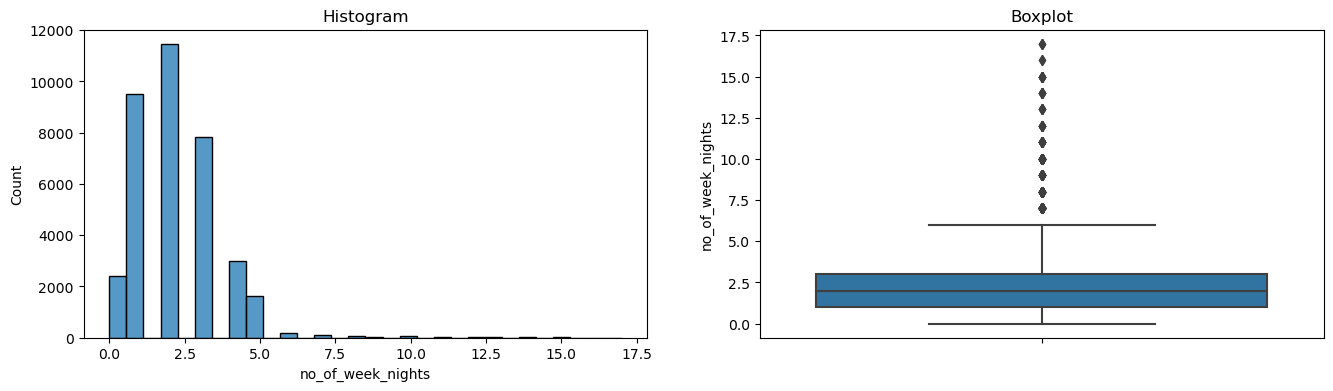

no_of_week_nights : None


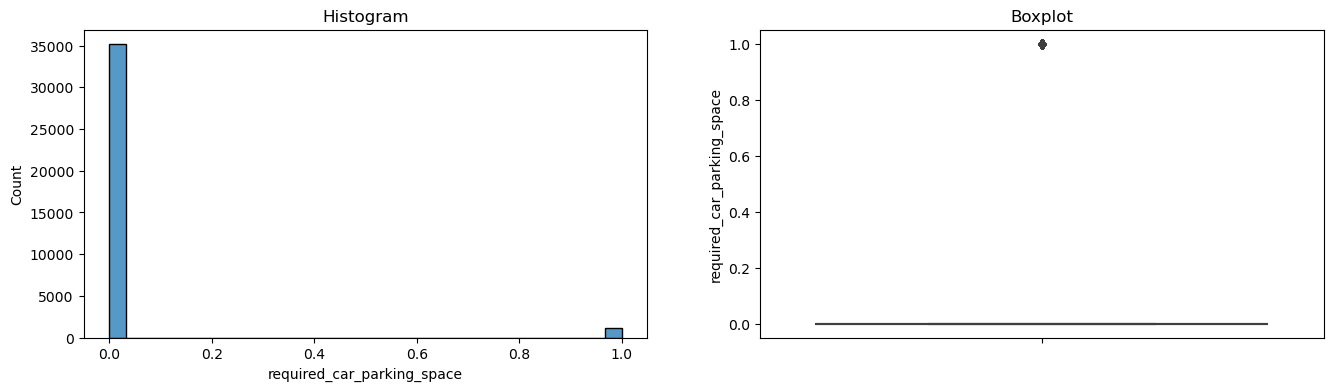

required_car_parking_space : None


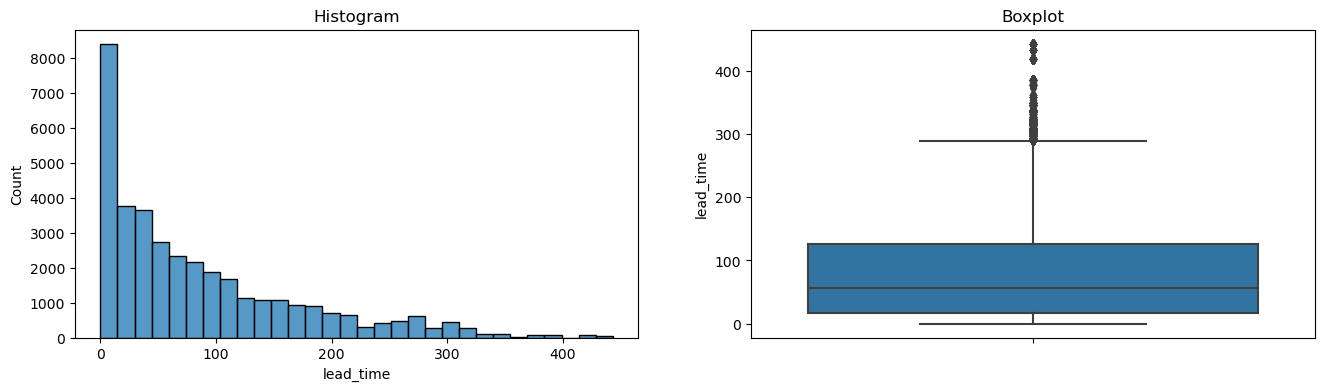

lead_time : None


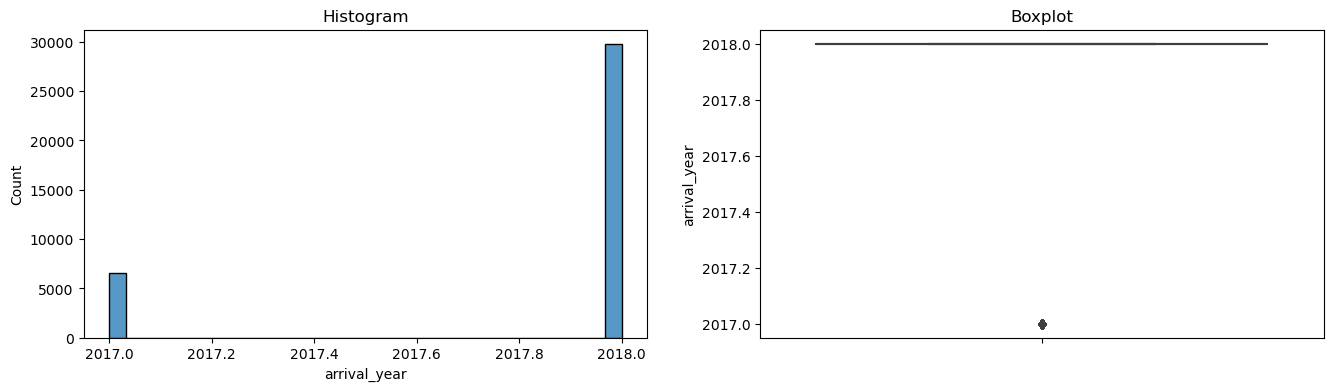

arrival_year : None


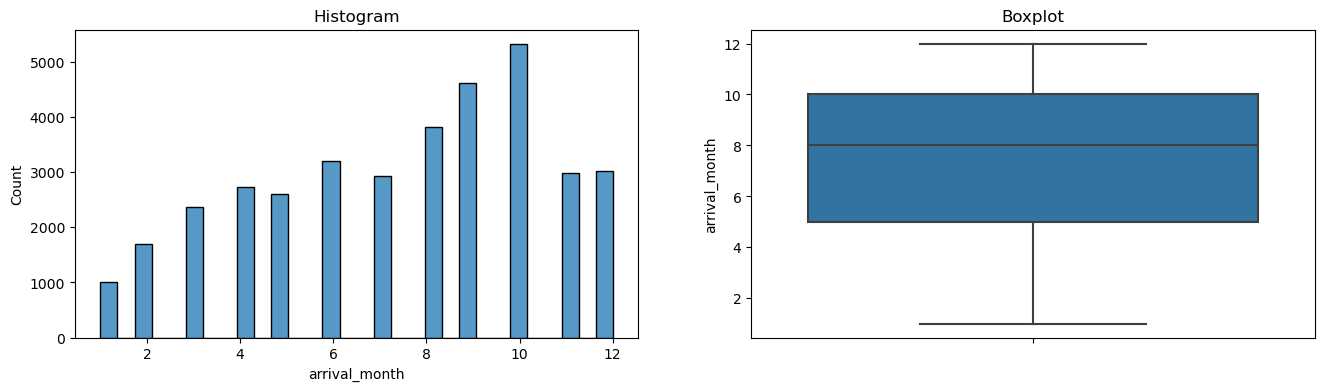

arrival_month : None


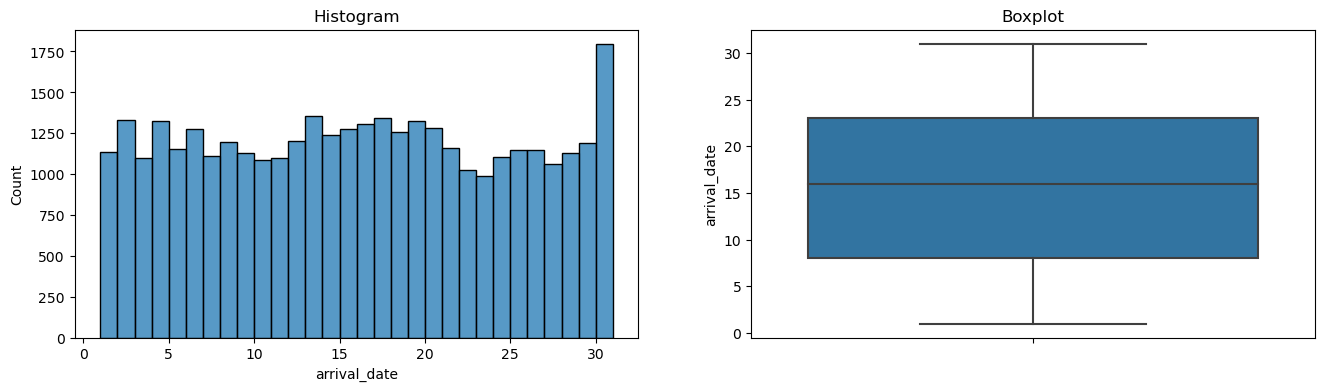

arrival_date : None


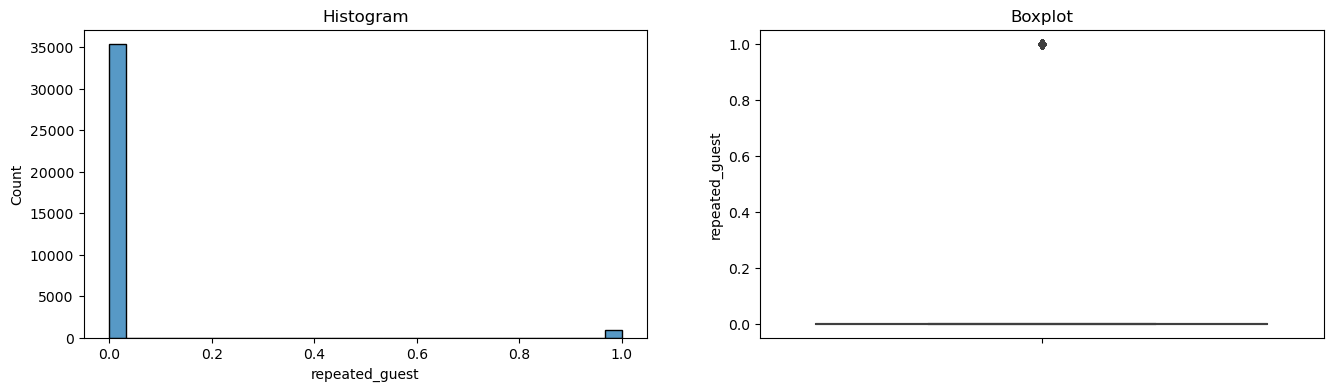

repeated_guest : None


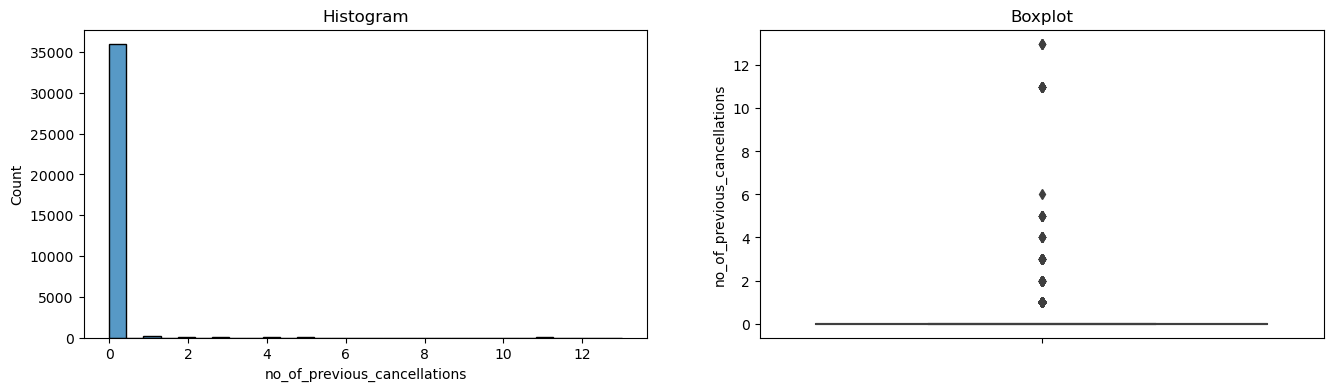

no_of_previous_cancellations : None


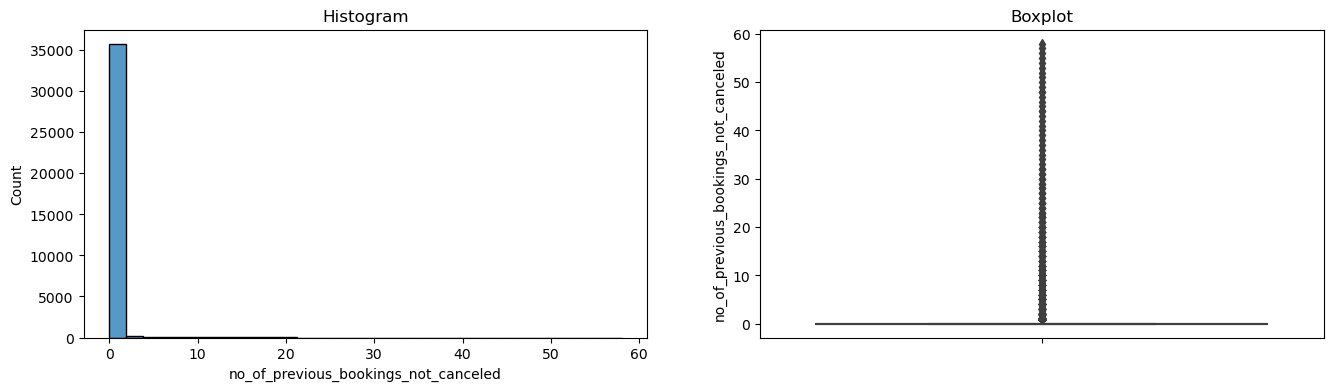

no_of_previous_bookings_not_canceled : None


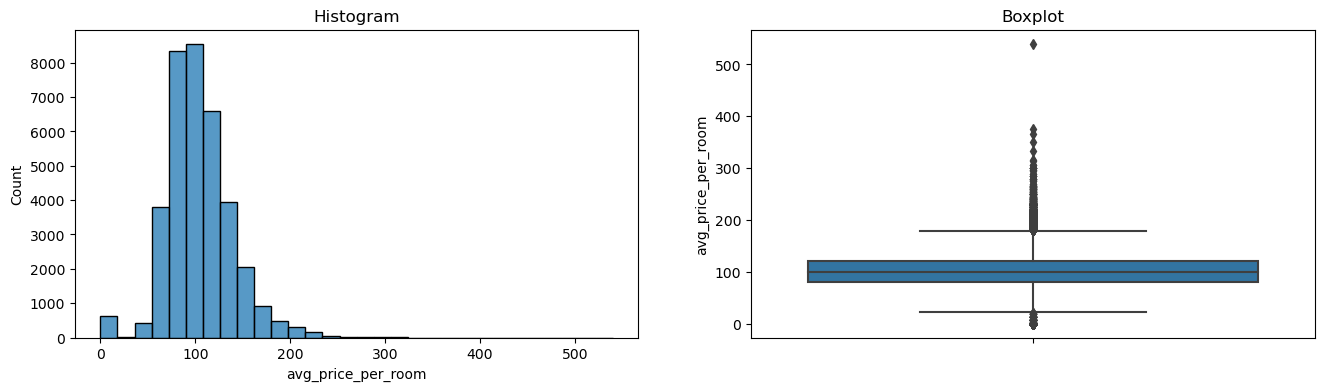

avg_price_per_room : None


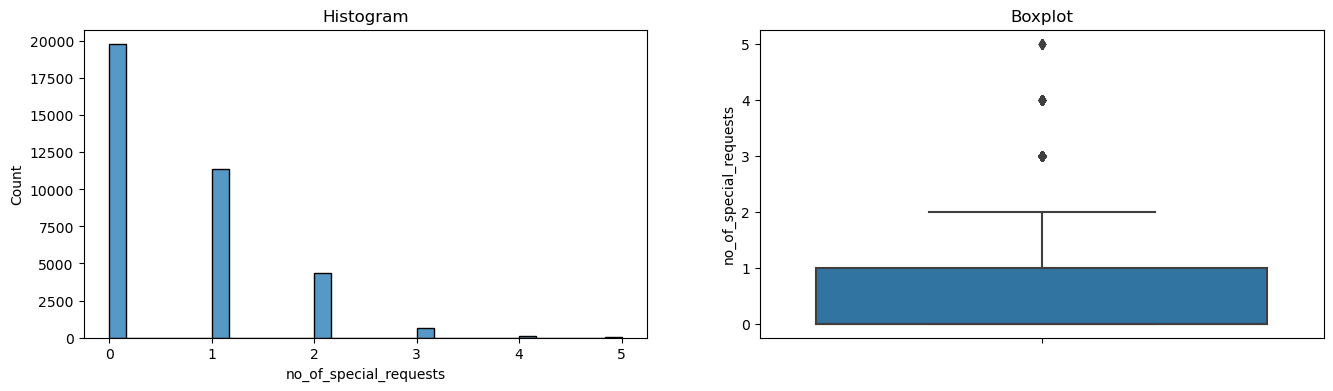

no_of_special_requests : None


In [23]:
print(numeric_data.skew())

for column in numeric_data:
  print(column, ":", diagnostic_plots(numeric_data,column))

Dilihat dari skewness dan boxplot, semua data tidak terdistribusi dengan normal.

In [24]:
# Membuat fungsi untuk mencari batas atas dan batas bawah
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [25]:
for column in numeric_data:
  print("Upper dan lower boundary dari kolom",column, ":", find_skewed_boundaries(numeric_data, column , 1.5))

Upper dan lower boundary dari kolom no_of_adults : (2.0, 2.0)
Upper dan lower boundary dari kolom no_of_children : (0.0, 0.0)
Upper dan lower boundary dari kolom no_of_weekend_nights : (5.0, -3.0)
Upper dan lower boundary dari kolom no_of_week_nights : (6.0, -2.0)
Upper dan lower boundary dari kolom required_car_parking_space : (0.0, 0.0)
Upper dan lower boundary dari kolom lead_time : (289.5, -146.5)
Upper dan lower boundary dari kolom arrival_year : (2018.0, 2018.0)
Upper dan lower boundary dari kolom arrival_month : (17.5, -2.5)
Upper dan lower boundary dari kolom arrival_date : (45.5, -14.5)
Upper dan lower boundary dari kolom repeated_guest : (0.0, 0.0)
Upper dan lower boundary dari kolom no_of_previous_cancellations : (0.0, 0.0)
Upper dan lower boundary dari kolom no_of_previous_bookings_not_canceled : (0.0, 0.0)
Upper dan lower boundary dari kolom avg_price_per_room : (179.55, 20.749999999999993)
Upper dan lower boundary dari kolom no_of_special_requests : (2.5, -1.5)


In [26]:
for column in numeric_data :
    upper_boundary, lower_boundary = find_skewed_boundaries(numeric_data, column, 1.5)
    outliers = numeric_data[numeric_data[column] > upper_boundary]
    print('Total data outliers in {}: {}'.format(column, len(outliers)))


Total data outliers in no_of_adults: 2333
Total data outliers in no_of_children: 2698
Total data outliers in no_of_weekend_nights: 21
Total data outliers in no_of_week_nights: 324
Total data outliers in required_car_parking_space: 1124
Total data outliers in lead_time: 1331
Total data outliers in arrival_year: 0
Total data outliers in arrival_month: 0
Total data outliers in arrival_date: 0
Total data outliers in repeated_guest: 930
Total data outliers in no_of_previous_cancellations: 338
Total data outliers in no_of_previous_bookings_not_canceled: 812
Total data outliers in avg_price_per_room: 1069
Total data outliers in no_of_special_requests: 761


## Cencoring

In [27]:
# Get Numeric Columns and Cetogory Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Num columns', num_columns)
print('Cat columns', cat_columns)

Num columns ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
Cat columns ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']


In [28]:
# Split Trains-Set and Test-Set based on Column types

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
33091,2,0,1,4,0,154,2018,9,12,0,0,0,80.75,0
4056,2,0,0,2,0,58,2018,12,9,0,0,0,93.60,1
33930,2,0,1,1,0,180,2018,5,2,0,0,0,100.00,1
16884,2,0,1,2,0,180,2018,10,28,0,0,0,100.08,2
34666,2,0,1,3,0,17,2018,3,17,0,0,0,97.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31044,2,0,1,1,0,17,2018,2,22,0,0,0,87.00,1
25631,2,0,0,2,0,0,2017,10,28,0,0,0,95.10,0
33174,1,0,0,1,0,1,2018,2,13,0,0,0,79.00,0
34959,3,0,0,3,0,63,2018,8,9,0,0,0,168.30,0


In [29]:
# Create the capper

windsoriser = Winsorizer(capping_method='gaussian',
                          tail='both',
                          fold=1.5,
                          variables=['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time','arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests'])
windsoriser.fit(X_train)

data_after = windsoriser.transform(X_train)

In [30]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'no_of_adults': 1.0666118203183828, 'no_of_children': -0.5023351803942873, 'no_of_weekend_nights': -0.49418360872015354, 'no_of_week_nights': 0.08532040316818046, 'required_car_parking_space': -0.2284885282613281, 'lead_time': -43.8861123904681, 'arrival_year': 2017.246561021438, 'arrival_month': 2.8121542770291104, 'arrival_date': 2.506544099614908, 'repeated_guest': -0.21252097572071732, 'no_of_previous_cancellations': -0.5491885443952951, 'no_of_previous_bookings_not_canceled': -2.5185330547273312, 'avg_price_per_room': 50.55671609588488, 'no_of_special_requests': -0.5617494818121939}
Right Tail Caps :  {'no_of_adults': 2.6196045821626646, 'no_of_children': 0.716876875776782, 'no_of_weekend_nights': 2.116444118713262, 'no_of_week_nights': 4.324534869057871, 'required_car_parking_space': 0.29017012715864027, 'lead_time': 214.42236325194295, 'arrival_year': 2018.395961376908, 'arrival_month': 12.02561278017282, 'arrival_date': 28.717370442080473, 'repeated_guest': 

In [31]:
print('Data - Before Capping')
print(X_train_num.describe())
print('')
print('Data - After Capping')
print(data_after.describe())

Data - Before Capping
       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  29020.000000    29020.000000          29020.000000       29020.000000   
mean       1.843108        0.107271              0.811130           2.204928   
std        0.517673        0.406411              0.870224           1.413096   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                29020.000000  29020.000000  29020.000000   29020.000000   
mean                     0.030841     85.268125   2017.821261       7.418884   
std              

In [32]:
X_train_num.shape

(29020, 14)

In [33]:
data_after.shape

(29020, 17)

In [34]:
# memasukan hasil transform windsorizer pada X_train_num
X_train= windsoriser.transform(X_train)

In [35]:
# memasukan hasil transform windsorizer pada X_test_num
X_test = windsoriser.transform(X_test)

## Missing Value

In [36]:
X_train.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
dtype: int64

Tidak terdapat missing value pada data

## Feature Selection

In [37]:
# creating dummies for income_bracket
target = data['booking_status']

# the independent variables set
X = data[['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                                 feature        VIF
0                           no_of_adults  16.448306
1                         no_of_children   1.242407
2                   no_of_weekend_nights   1.959993
3                      no_of_week_nights   3.678980
4             required_car_parking_space   1.062769
5                              lead_time   2.174975
6                           arrival_year  29.448847
7                          arrival_month   7.158118
8                           arrival_date   4.204407
9                         repeated_guest   1.595823
10          no_of_previous_cancellations   1.337686
11  no_of_previous_bookings_not_canceled   1.603672
12                    avg_price_per_room  12.751692
13                no_of_special_requests   1.797588


Nilai multikolinearitas > 5 tidak cocok untuk digunakan dalam modeling, maka feature yang akan digunakan adalah no_of_children, no_of_weekend_nights,no_of_week_nights, required_car_parking_space, lead_time, arrival_date, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, no_of_special_requests

Untuk data kategorikal akan di cek korelasinya menggunakan chi square

In [38]:
# Assuming cat_data is your DataFrame containing categorical variables
cat_data = data[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']]
target = data['booking_status']

# Encode target variable using LabelEncoder
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Encode categorical data using LabelEncoder
data_encoded = cat_data.apply(LabelEncoder().fit_transform)

# Feature selection for categorical data
chi_scores_cat = chi2(data_encoded, target_encoded)
p_values_cat = pd.Series(chi_scores_cat[1], index=cat_data.columns)
p_values_cat.sort_values(ascending=False, inplace=True)
print(p_values_cat)


room_type_reserved     3.367809e-13
type_of_meal_plan      1.135087e-13
market_segment_type    7.480144e-21
dtype: float64


p value yang lebih rendah umumnya menunjukkan asosiasi yang lebih signifikan, menunjukkan bahwa fitur yang sesuai cenderung informatif untuk memprediksi target. <br>

Pada hasil feature selection, semua feature memiliki korelasi terhadapt target

# Model Section

## Model Definition

In [39]:
X_train_cat.columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], dtype='object')

In [40]:
# Membagi feature kategori dan numerik yang akan di scaling dan encode
numeric_features = X_train[['no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
       'required_car_parking_space', 'lead_time', 'arrival_date',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'no_of_special_requests']]
categorical_features = X_train[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']]

In [41]:
# transform kategori dan numerik data menggunakan pipeline
numeric_transformer = Pipeline(steps=[("scaler", MinMaxScaler())])
categorical_transformer = Pipeline(steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))])

# transform numerikal dan kategorikal data
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features.columns),
    ("cat", categorical_transformer, categorical_features.columns)
],remainder='drop')

# Model definition untuk classifier
log_reg = LogisticRegression()
svm_clf = SVC()
tree_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

# menggunakan pipeline step
pipelines = [
    ("Logistic Regression", log_reg),
    ("SVM", svm_clf),
    ("Decision Tree", tree_clf),
    ("Random Forest", rf_clf)
]

In [42]:
#cek crossvalidation untuk masing-masing model agar mengetahui model yang paling sesuai untuk data hotel

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
pos_label = 'Not_Canceled'

f1_scores = {}
for name, classifier in pipelines:
    model = Pipeline(steps=[("preprocessor", preprocessor), (name, classifier)])
    scorer = make_scorer(f1_score, pos_label=pos_label)
    try:
        f1_scores[name] = cross_val_score(model, X_train, y_train, cv=skf, scoring=scorer, error_score='raise')
    except Exception as e:
        print(f"An error occurred while fitting {name}: {e}")

# dtaframe untuk kolom classifier, mean f1 score dan std f1 score
results_df = pd.DataFrame(columns=['Classifier', 'Mean F1 Score', 'Std F1 Score'])

# Print the F1 scores for each classifier
for name, scores in f1_scores.items():
    mean_f1 = scores.mean()
    std_f1 = scores.std()
    results_df = results_df.append({
        'Classifier': name,
        'Mean F1 Score': mean_f1,
        'Std F1 Score': std_f1
    }, ignore_index=True)

# Print the DataFrame
results_df

c:\Users\arywi\miniconda3\envs\DataScience\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\arywi\miniconda3\envs\DataScience\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

C:\Users\arywi\AppData\Local\Temp\ipykernel_8792\857274479.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\arywi\AppData\Local\Temp\ipykernel_8792\857274479.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\arywi\AppData\Local\Temp\ipykernel_8792\857274479.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\arywi\AppData\Local\Temp\ipykernel_8792\857274479.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


,Classifier,Mean F1 Score,Std F1 Score
0,Logistic Regression,0.846612,0.004171
1,SVM,0.860147,0.004550
2,Decision Tree,0.863972,0.002567
3,Random Forest,0.892956,0.003768


Berdasarkan hasil cross validation, mencari nilai mean yang tinggi dan std yang rendah, saya memilih random forest

In [43]:
# Mengambil sample hanya 1000 data untuk mempercepat proses grid search
X_train_subset = X_train.sample(n=1000, random_state=42)
y_train_subset = y_train[X_train_subset.index]

pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier())
])

param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [3, 4, 5],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__min_samples_leaf': [1, 2, 3],
    'classifier__min_samples_split': [2, 3, 4],
    'classifier__n_estimators': [100, 200, 300]
}


grid = GridSearchCV(pipe, param_grid=param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))

c:\Users\arywi\miniconda3\envs\DataScience\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\arywi\miniconda3\envs\DataScience\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\arywi\miniconda3\envs\DataScience\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remo

Best cross-validation accuracy: 0.78


In [44]:
# print best hyperparameter dari hasil gridsearch

print("Best Hyperparameters: ", grid.best_params_)

Best Hyperparameters:  {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 3, 'classifier__n_estimators': 100}


In [45]:
# Model definition hasil pipeline

best_model = grid.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
       'required_car_parking_space', 'lead_time', 'arrival_date',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'no_of_special_requests'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=5, max_features='auto',
                                        min_samples_leaf=3,
                                        min_samples_split=3))])

In [46]:
y_train_pred = best_model.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)

F1 Score - Test Set: 0.8512270647501964
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.80      0.44      0.56      9539
Not_Canceled       0.77      0.95      0.85     19481

    accuracy                           0.78     29020
   macro avg       0.79      0.69      0.71     29020
weighted avg       0.78      0.78      0.76     29020



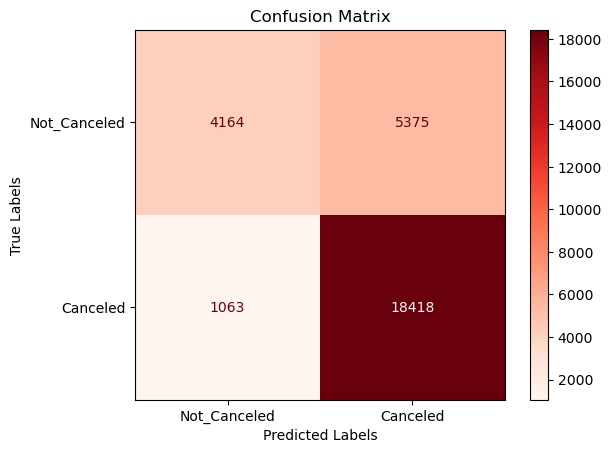

In [47]:
# Print F1 scores
f1 = f1_score(y_train, y_train_pred, pos_label='Not_Canceled')  # Not_Canceled class positive
print('F1 Score - Test Set:', f1)

# Print classification report
print('Classification Report:')
print(classification_report(y_train, y_train_pred))

# Plot confusion matrix
class_labels = ['Not_Canceled', 'Canceled']
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_labels)
cm_display.plot(cmap='Reds')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [48]:
y_pred = best_model.predict(X_test)

#cek menggunakan confussion matrix
cm = confusion_matrix(y_test, y_pred)

F1 Score - Test Set: 0.848055887489659
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.77      0.42      0.54      2346
Not_Canceled       0.77      0.94      0.85      4909

    accuracy                           0.77      7255
   macro avg       0.77      0.68      0.70      7255
weighted avg       0.77      0.77      0.75      7255



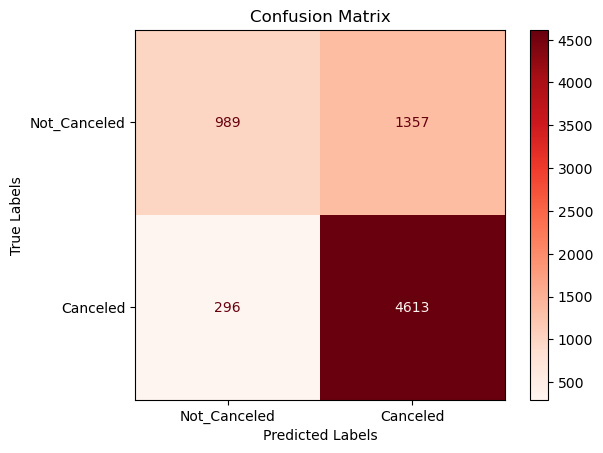

In [49]:
# Print F1 scores
f1 = f1_score(y_test, y_pred, pos_label='Not_Canceled')  # Not_Canceled class positive
print('F1 Score - Test Set:', f1)

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
class_labels = ['Not_Canceled', 'Canceled']
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
cm_display.plot(cmap='Reds')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Hasil confussion matrix pada test set menunjukan recall pada label canceled yang masih rendah yang artinya tingkat keakuratan nya hanya 45% dan precision sebesar 74%.
Jika dilihat dari table confusion matrix, recall value itu adalah 366 yang artinya sebanyak 366 orang yang melakukan cancelation salah prediksi menjadi orang yang tidak jadi cancel. Sedangkan untuk value precision adalah 1283 orang yang tidak melakukan cancel tapi di prediksi melakukan cancelation. Dilihat dari urgency hasil confusion matrix, sebaiknya kita fokus untuk meminimalkan jumlah recall value dan menaikan tingkat akurasi dari recall value.

# Model Saving

In [55]:
joblib.dump(best_model, "best_model.pkl")

['best_model.pkl']

# Model Inference

In [57]:
load_model = joblib.load("best_model.pkl")

In [58]:
# Create New Data

data_inf = {
    'Booking_ID': 'INN36730',
    'no_of_adults': 2,
    'no_of_children': 2,
    'no_of_weekend_nights':3,
    'no_of_week_nights':1,
    'type_of_meal_plan': 'Meal Plan 1',
    'required_car_parking_space': 1,
    'room_type_reserved': 'Room_Type 1',
    'lead_time': 24,
    'arrival_year': 2019,
    'arrival_month': 9,
    'arrival_date': 29,
    'market_segment_type': 'online',
    'repeated_guest': 0,
    'no_of_previous_cancellations': 0,
    'no_of_previous_bookings_not_canceled': 0,
    'avg_price_per_room': 115,
    'no_of_special_requests': 1
}

data_inf = pd.DataFrame([data_inf])
data_inf

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,INN36730,2,2,3,1,Meal Plan 1,1,Room_Type 1,24,2019,9,29,online,0,0,0,115,1


In [59]:
data_inf_pred = best_model.predict(data_inf)
data_inf_pred

array(['Not_Canceled'], dtype=object)

# Kesimpulan
1. Based on EDA <br>
Berdasarkan data, terdapat 32.76% orang yang melakukan cancelation dan mayoritas customer melakukan reservasi online. Jumlah reservasi biasanya untuk 2 orang dan tidak membawa anak-anak dan biasanya menginap dalam jangka waktu pendek kurang lebih selama 1-3 hari. Orang yang melakukan cancelation biasanya sudah melakukan reservasi jauh hari sebelum arrival date dan biasanya guest yang meminta special request semakin kecil kemungkinan melakukan cancelation. Peak season berada di bulan 9-10
2. Based on Model Evaluation<br>
Setelah melakukan evaluasi menggunakan confussion matrix, nilai dari recall metrix pada label canceled masih rendah yaitu 45% dan precision 77% di test set. Untuk selanjutnya dapat mencoba menggunakan model klasifikasi lainnya seperti KNN, Naive bayes, hard voting, svm dll.

Next step:
Saya menyarankan fokus untuk menurunkan jumlah kesalahan pada recall metrix karena metrix tersebut salah memprediksi guest yang melakukan cancelation menjadi tidak cancel. Hal ini dapat berdampak pada kinerja hotel karena alasan orang melakukan cancelation bisa dijadikan bahan evaluasi untuk dapat meningkatkan fasilitas atau layanan yang disediakan oleh hotel.